In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parámetros 
a_true = np.array([0.1, 0.1])
sigma = 0.25
lambda_ = 0.99
P = np.eye(2)
the = np.zeros((2, 1))

In [ ]:
# definición de la función de costo
np.random.seed(0)
x = np.linspace(0, 10, 100)
H = np.vstack((x, x**2)).T  
v = np.random.normal(0, sigma, size=x.shape)
y = a_true[0]*x + a_true[1]*x**2 + v

the_h = []

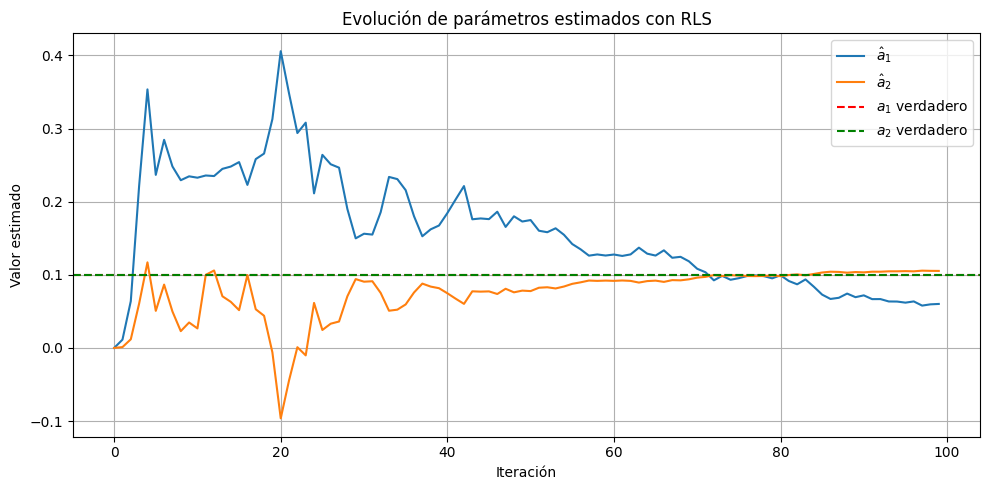

In [ ]:
# RLS
for k in range(len(x)):
    H_k = H[k].reshape(1, -1)
    y_k = y[k]
    
    # Error
    e_k = y_k - H_k @ the
    
    # Ganancia de Kalman
    denominator = lambda_ + H_k @ P @ H_k.T
    K = P @ H_k.T @ np.linalg.inv(denominator)
    the = the + K @ e_k
    
    P = (P - K @ H_k @ P) / lambda_
    
    
    the_h.append(the.flatten())

the_h = np.array(the_h)

In [ ]:
# Grafica
plt.figure(figsize=(10, 5))
plt.plot(the_h[:, 0], label=r'$\hat{a}_1$')
plt.plot(the_h[:, 1], label=r'$\hat{a}_2$')
plt.axhline(y=a_true[0], color='r', linestyle='--', label=r'$a_1$ verdadero')
plt.axhline(y=a_true[1], color='g', linestyle='--', label=r'$a_2$ verdadero')
plt.xlabel("Iteración")
plt.ylabel("Valor estimado")
plt.title("Evolución de parámetros estimados con RLS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()